# Наивный байесовский классификатор (Naive Bayes classifier)

# References

**Источники:**

[sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

[Naive Bayes Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)

[4 Types of Classification Tasks in Machine Learning](https://machinelearningmastery.com/types-of-classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20refers,one%20of%20the%20known%20characters.)

[Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

[Теорема Байеса](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0)

[Введение в теорию вероятностей](https://shkolkovo.net/catalog/vvedenie_v_teoriyu_veroyatnostej/zadachi_povyshennogo_urovnya_slozhnosti_2)

# References


## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__

'0.24.1'

In [8]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

## Загрузка данных

[Источник (Classification Data -Apples & Oranges)](https://www.kaggle.com/raykleptzo/classification-data-apples-oranges).

In [9]:
df = pd.read_csv("./../../data/apples_and_oranges.csv")

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = "{:.2f}".format

# отобразить первые 5 и последние 5 строк
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


### Предварительная обработка (pre-processing) и выбор (selection) данных

In [10]:
X = df[["Weight", "Size"]]
X

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70
5,73,5.68
6,70,5.56
7,75,5.11
8,74,5.36
9,65,4.27


In [11]:
y = df["Class"].map({"orange": 0, "apple": 1})
y

0     0
1     0
2     0
3     1
4     0
5     1
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    0
14    1
15    0
16    0
17    1
18    0
19    1
20    0
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    1
29    1
30    1
31    0
32    1
33    1
34    0
35    0
36    0
37    1
38    1
39    1
Name: Class, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(
    "Shape of X training set {}".format(X_train.shape),
    "&",
    " Size of y training set {}".format(y_train.shape),
)

Shape of X training set (28, 2) &  Size of y training set (28,)


## Теорема Байеса

TODO

**Теорема Байеса (или формула Байеса)** — одна из основных теорем элементарной теории вероятностей, которая **позволяет определить вероятность какого-либо события при условии, что произошло другое статистически взаимозависимое с ним событие**.

Другими словами, по формуле Байеса можно более точно пересчитать вероятность, взяв в расчёт как ранее известную информацию, так и данные новых наблюдений. 

## Наивный байесовский классификатор (Naive Bayes classifier)

Наивный байесовский классификатор (Naive Bayes classifier) - это простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

Несмотря на наивный вид и, несомненно, очень упрощенные условия, наивные байесовские классификаторы часто работают намного лучше нейронных сетей во многих сложных ситуациях.

Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

Хоть наивный байесовский классификатор известен как хороший классификатор, он также известен как плохой оценщик, поэтому **к вероятностным выходным данным `pred_proba` не стоит относиться слишком серьезно**.

In [13]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model

GaussianNB()

In [14]:
model.fit(X_train, y_train)

GaussianNB()

In [15]:
y_predicted = model.predict(X_test)

## Оценка качества модели (Evaluation)

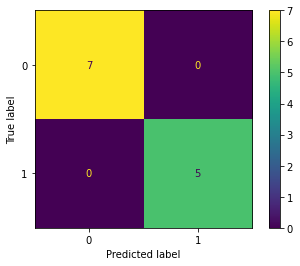

In [16]:
plot_confusion_matrix(model, X_test, y_test)

In [17]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [18]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average="macro")
recall = recall_score(y_test, y_predicted, average="macro")
f1 = f1_score(y_test, y_predicted, average="macro")
roc_auc = roc_auc_score(y_test, y_predicted, average="macro")

print(
    f"accuracy = {accuracy:.3f}\nprecision = {precision:.3f}\nrecall = {recall:.3f}\nf1 = {f1:.3f}\nroc_auc = {roc_auc:.3f}"
)

accuracy = 1.000
precision = 1.000
recall = 1.000
f1 = 1.000
roc_auc = 1.000


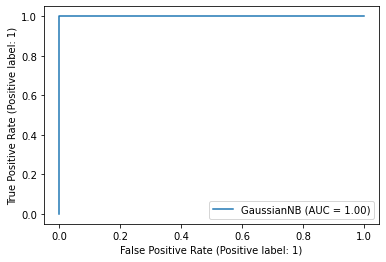

In [19]:
plot_roc_curve(model, X_test, y_test)

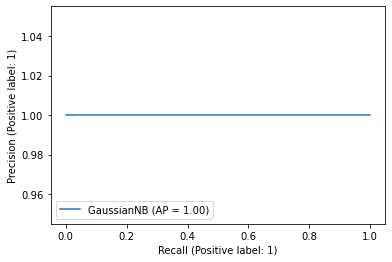

In [20]:
plot_precision_recall_curve(model, X_test, y_test)